In [2]:
import pandas as pd

# read in the first dataset containing information about the Quranic verses
verses_df = pd.read_excel('D:/Coran.xlsx')

# read in the second dataset containing the TF-IDF values of each word in the Quran
tfidf_df = pd.read_excel('D:/matrixTFIDF.xlsx')

print(verses_df)


      Unnamed: 0  Unnamed: 1  SORANO SORATYPE SORANAME             Lemmes
0              0           0       1     مكية  الفاتحة   اسم الله رحم رحم
1              1           1       1     مكية  الفاتحة   حمد الله رب عالم
2              2           2       1     مكية  الفاتحة            رحم رحم
3              3           3       1     مكية  الفاتحة       مالك يوم دين
4              4           4       1     مكية  الفاتحة         عبد استعان
...          ...         ...     ...      ...      ...                ...
6231        6231           2     114     مكية    الناس          ملك إنسان
6232        6232           3     114     مكية    الناس         الله إنسان
6233        6233           4     114     مكية    الناس      شر وسواس خناس
6234        6234           5     114     مكية    الناس     وسوس صدر إنسان
6235        6235           6     114     مكية    الناس          جنة إنسان

[6236 rows x 6 columns]


In [3]:
# print the column names of the first dataframe
print(verses_df.columns)

# print the column names of the second dataframe
print(tfidf_df.columns)
# rename the "Unnamed: 0" column in the tfidf_df to "Lemmes"
tfidf_df.rename(columns={"Unnamed: 0": "Lemmes"}, inplace=True)

# merge the two datasets on the "Lemmes" columns
merged_df = pd.merge(verses_df, tfidf_df, on="Lemmes")

# print the merged dataset
print(merged_df)



Index(['Unnamed: 0', 'Unnamed: 1', 'SORANO', 'SORATYPE', 'SORANAME', 'Lemmes'], dtype='object')
Index(['Unnamed: 0', 'آت', 'آتى', 'آتية', 'آثر', 'آثم', 'آخذ', 'آخر', 'آخرة',
       'آدم',
       ...
       'يم', 'يمنى', 'يمين', 'ينبوع', 'ينع', 'يهود', 'يهودي', 'يوسف', 'يوم',
       'يونس'],
      dtype='object', length=4034)
      Unnamed: 0  Unnamed: 1  SORANO SORATYPE SORANAME             Lemmes  \
0              0           0       1     مكية  الفاتحة   اسم الله رحم رحم   
1              1           1       1     مكية  الفاتحة   حمد الله رب عالم   
2              1           1       1     مكية  الفاتحة   حمد الله رب عالم   
3           3969         182      37     مكية  الصافات   حمد الله رب عالم   
4           3969         182      37     مكية  الصافات   حمد الله رب عالم   
...          ...         ...     ...      ...      ...                ...   
7996        6231           2     114     مكية    الناس          ملك إنسان   
7997        6232           3     114     مكية    الناس   

In [4]:
print(merged_df.columns)

print ( merged_df.iloc[:5, :10])

Index(['Unnamed: 0', 'Unnamed: 1', 'SORANO', 'SORATYPE', 'SORANAME', 'Lemmes',
       'آت', 'آتى', 'آتية', 'آثر',
       ...
       'يم', 'يمنى', 'يمين', 'ينبوع', 'ينع', 'يهود', 'يهودي', 'يوسف', 'يوم',
       'يونس'],
      dtype='object', length=4039)
   Unnamed: 0  Unnamed: 1  SORANO SORATYPE SORANAME             Lemmes   آت  \
0           0           0       1     مكية  الفاتحة   اسم الله رحم رحم  0.0   
1           1           1       1     مكية  الفاتحة   حمد الله رب عالم  0.0   
2           1           1       1     مكية  الفاتحة   حمد الله رب عالم  0.0   
3        3969         182      37     مكية  الصافات   حمد الله رب عالم  0.0   
4        3969         182      37     مكية  الصافات   حمد الله رب عالم  0.0   

   آتى  آتية  آثر  
0  0.0   0.0  0.0  
1  0.0   0.0  0.0  
2  0.0   0.0  0.0  
3  0.0   0.0  0.0  
4  0.0   0.0  0.0  


In [5]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# select the features (TF-IDF values) and target variable (type of the verse)
X = merged_df.iloc[:, 7:]
y = merged_df['SORATYPE']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# evaluate the accuracy of the KNN classifier on the test set
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7988757026858213


<AxesSubplot: >

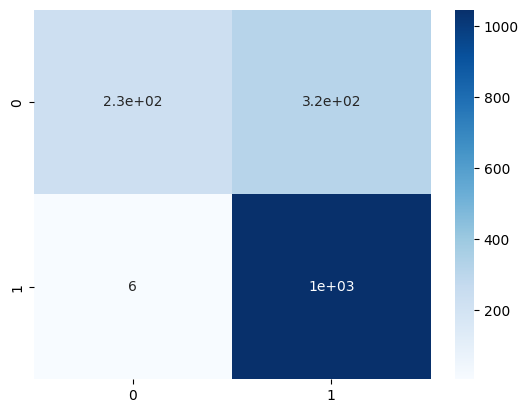

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = knn.predict(X_test)
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")

In [7]:
from sklearn.preprocessing import StandardScaler

# normalize the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# train a KNN classifier with k=5 on the normalized features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_norm, y_train)

# evaluate the accuracy of the KNN classifier on the test set
accuracy = knn.score(X_test_norm, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7963772642098689


In [8]:
print(tfidf_df.dtypes)


Lemmes     object
آت        float64
آتى       float64
آتية      float64
آثر       float64
           ...   
يهود      float64
يهودي     float64
يوسف      float64
يوم       float64
يونس      float64
Length: 4034, dtype: object


<AxesSubplot: >

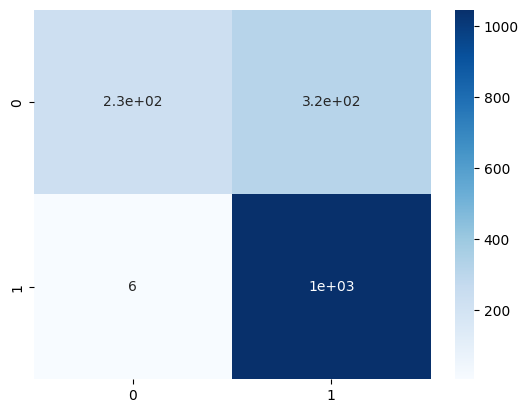

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

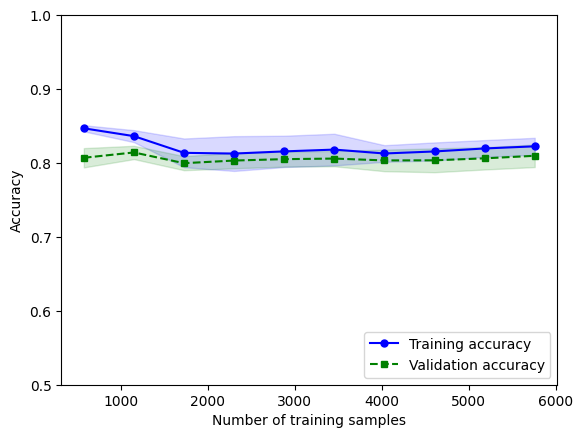

In [11]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(estimator=knn, 
                                                        X=X_train, 
                                                        y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), 
                                                        cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.8998397435897436


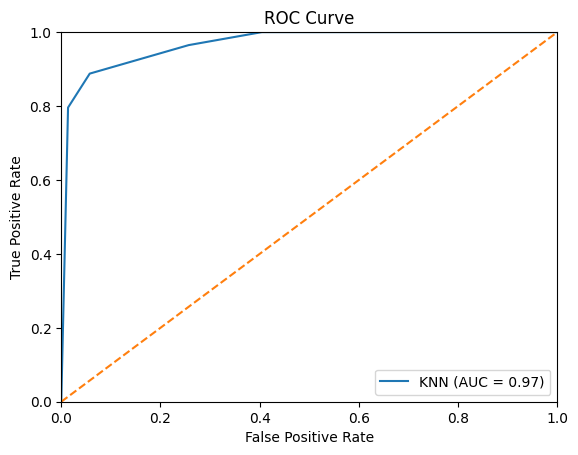

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split data into features and target
X = verses_df[['SORANO', 'Unnamed: 1']]
y = verses_df['SORATYPE']

# Convert target variable to binary format
lb = LabelBinarizer()
y = lb.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate ROC curve and AUC
y_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into features and target
X = tfidf_df.drop('Lemmes', axis=1)
y = tfidf_df['Lemmes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.02564102564102564


The accuracy score of 0.0256 suggests that the KNN model did not perform well on the test data. This means that the model is not able to accurately predict the SORATYPE based on the SORANO and Unnamed: 1 features.

There could be several reasons why the model did not perform well. One possible reason is that the features used may not be very informative or relevant to predicting the target variable. Another reason could be that the KNN model is not suitable for this particular problem and a different algorithm should be used instead.

Further analysis of the data and experimentation with different models and features may be necessary to improve the accuracy of the predictions.

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print(class_report)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
